# BT4103 Data Driven Learning Analytics 

The aim of the project is technology exploration, evaluation, and/or development and integration of data analytics and machine learning on individual learners’ data, which can help curriculum managers observe performance trends, reflect critically and make data-driven actions.

## Research Overview

Write something here

## Importing necessary libraries and datasets

In [1]:
##standard data handling and visualization imports
import numpy as np
import pandas as pd
from copy import deepcopy
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
from seaborn import diverging_palette
import time
sns.set(color_codes=True)

import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
from _plotly_future_ import v4_subplots
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.subplots as sb
import plotly.figure_factory as ff

In [2]:
log = pd.read_csv('data/Log_Problem.csv')
content = pd.read_csv('data/Info_Content.csv')
user = pd.read_csv('data/Info_UserData.csv')

Talk about Proficiency Mechanism here

## Data Overview

Understanding the data set

Assumptions made

## Data Cleaning

- Understanding the hierachy level of the various hashes

In [113]:
lvl1 = Node("Level 1 Hash (Math)")
lvl2 = Node("Level 2 Hash (Geometric)", parent=lvl1)
lvl3 = Node("Level 3 Hash (Triangle)", parent=lvl2)
lvl4 = Node("Level 4 Hash (Area)", parent=lvl3)
ucid1 = Node("Content 1", parent=lvl4)
ucid2 = Node("Content 2", parent=lvl4)
upid1 = Node("Problem 1", parent=ucid1)
upid2 = Node("Problem 2", parent=ucid1)
upid3 = Node("Problem 3", parent=ucid1)
upid4 = Node("Problem 4", parent=ucid2)

In [115]:
DotExporter(lvl1).to_picture("hash_structures.png")

<img src='hash_structures.png'>

In [120]:
print(f"There are {len(content['level1_id'].unique())} unique level 1 in the dataset")
print(f"There are {len(content['level2_id'].unique())} unique level 2 in the dataset")
print(f"There are {len(content['level3_id'].unique())} unique level 3 in the dataset")
print(f"There are {len(content['level4_id'].unique())} unique level 4 in the dataset")
print(f"There are {len(log['ucid'].unique())} unique contents in the dataset")
print(f"There are {len(log['upid'].unique())} unique problems in the dataset")

There are 1 unique level 1 in the dataset
There are 10 unique level 2 in the dataset
There are 42 unique level 3 in the dataset
There are 171 unique level 4 in the dataset
There are 1326 unique contents in the dataset
There are 25785 unique problems in the dataset


### Check if data includes users that do not have log - Inactive user

explain why this is needed 

In [29]:
print(f"Number of users that do not have a log : {len(user[~user.uuid.isin(log.uuid.unique())])}")

Number of users that do not have a log : 0


### Check if content data includes content that do not have log (Inactive content)

explain why this is needed 

In [189]:
print(f"Number of contents that do not have a log : {len(content[~content.ucid.isin(log.ucid.unique())])}")

Number of contents that do not have a log : 4


### Proportion of users

In [132]:
def plotVariableAnalysis(df, cts_features, cat_features):      
    print("\033[1m" + "For Continous Features:" + "\n\n\n")    
    for col_name in cts_features:    
        plt.figure(figsize=(14,6))
        plt.subplot(111)
        print('\033[1m' + col_name.upper() + ":" + '\033[0m')
        ax = sns.distplot(df[col_name])
        plt.title(f"Distribution of {col_name}")
        plt.show()
        print(f"\033[1m Statistical Analysis of {col_name.upper()}:\n\n\n")   
        print(df[col_name].describe())
        print(" ")
    
    print("\033[1m" + "For Categorical Features:" + "\n\n\n")
    for col_name in cat_features:
        print("\033[1m" + col_name.upper() + ":" + "\033[0m")
        print(df[col_name].value_counts())
        print(" ")
        
        ## Pie Chart Proportion
        plt.figure(figsize=(14,6))
        plt.subplot(121)
        df[col_name].value_counts().plot.pie(autopct  = "%1.0f%%")
        plt.title(f"{col_name} Proportion Distribution")
        plt.ylabel("")

        ## Bar Chart Raw Number
        plt.subplot(122)
        sns.countplot(x=col_name, data=df)
        plt.title(f"{col_name} Distribution Raw Numbers")
        plt.show()
        print(" ")

For User data

For Continous Features:



POINTS:


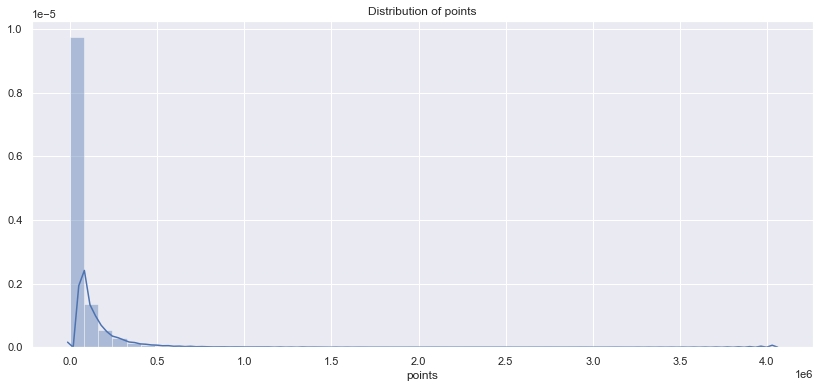

 Statistical Analysis of POINTS:



count    7.275800e+04
mean     6.304759e+04
std      1.242042e+05
min      1.000000e+00
25%      6.285000e+03
50%      2.040000e+04
75%      6.531375e+04
max      4.047528e+06
Name: points, dtype: float64
 
BADGES_CNT:


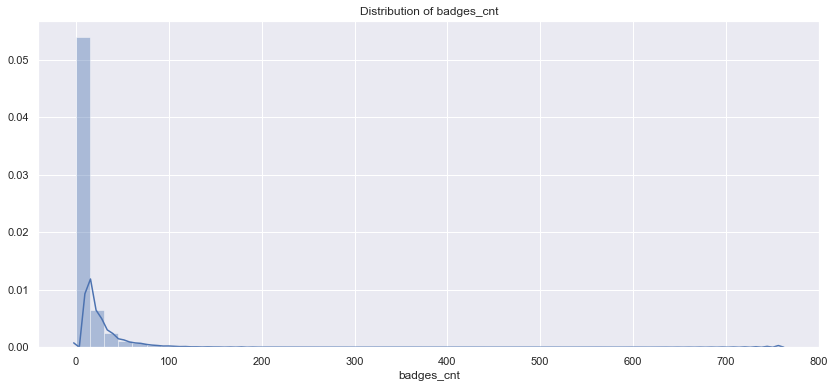

 Statistical Analysis of BADGES_CNT:



count    72758.000000
mean         9.543789
std         19.036328
min          0.000000
25%          0.000000
50%          3.000000
75%         10.000000
max        760.000000
Name: badges_cnt, dtype: float64
 
USER_GRADE:


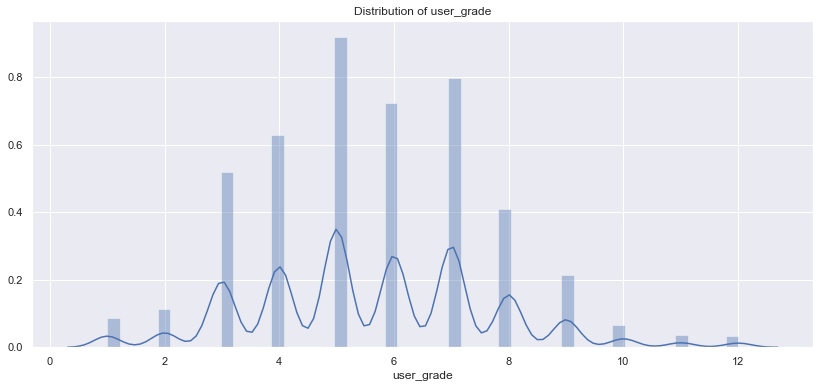

 Statistical Analysis of USER_GRADE:



count    72758.000000
mean         5.620715
std          2.041178
min          1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: user_grade, dtype: float64
 
HAS_TEACHER_CNT:


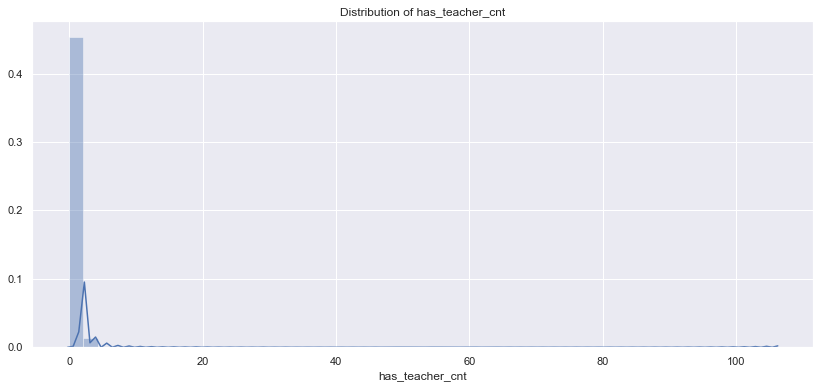

 Statistical Analysis of HAS_TEACHER_CNT:



count    72758.000000
mean         0.884810
std          1.552795
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        106.000000
Name: has_teacher_cnt, dtype: float64
 
HAS_STUDENT_CNT:


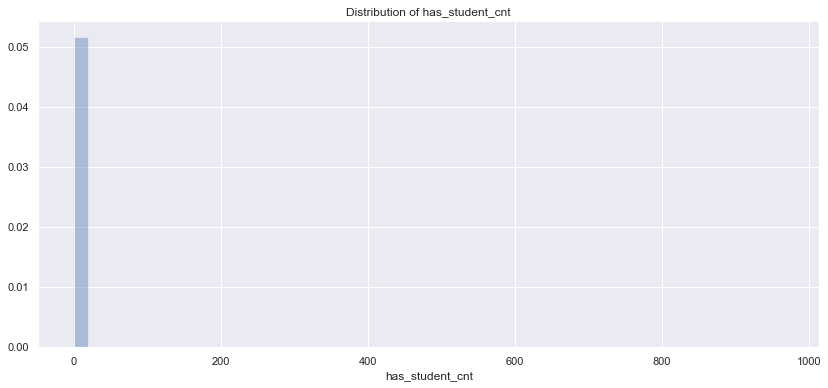

 Statistical Analysis of HAS_STUDENT_CNT:



count    72758.000000
mean         0.203304
std          6.413944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        966.000000
Name: has_student_cnt, dtype: float64
 
BELONGS_TO_CLASS_CNT:


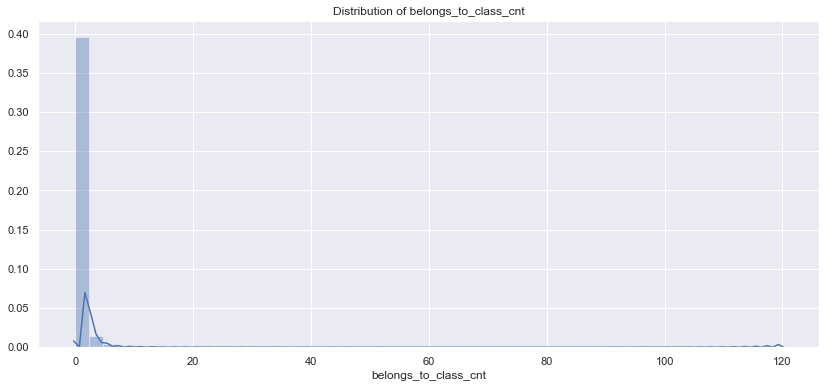

 Statistical Analysis of BELONGS_TO_CLASS_CNT:



count    72758.000000
mean         0.873306
std          1.961188
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        120.000000
Name: belongs_to_class_cnt, dtype: float64
 
HAS_CLASS_CNT:


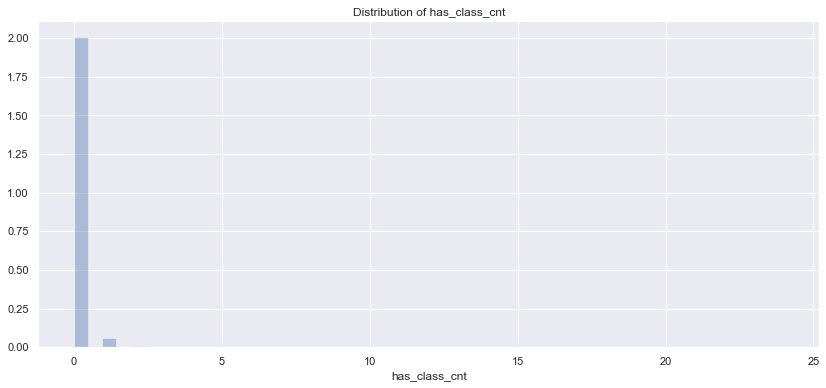

 Statistical Analysis of HAS_CLASS_CNT:



count    72758.000000
mean         0.046442
std          0.315060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: has_class_cnt, dtype: float64
 
For Categorical Features:



GENDER:
female         13099
male           12856
unspecified     6950
Name: gender, dtype: int64
 


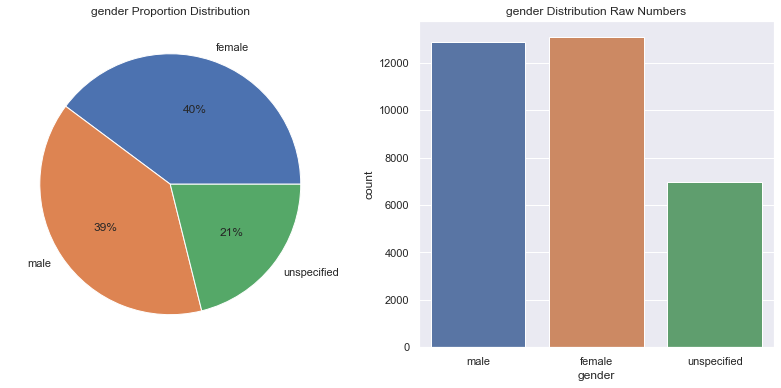

 
USER_CITY:
tp      12494
ntpc    10808
tc      10710
ty       7615
kh       6888
tn       4033
ylc      2607
hc       2361
chc      2269
ptc      2064
ntct     1759
ml       1662
ilc      1594
ttct     1435
cy       1415
hlc      1400
km        658
phc       481
kl        457
lj         48
Name: user_city, dtype: int64
 


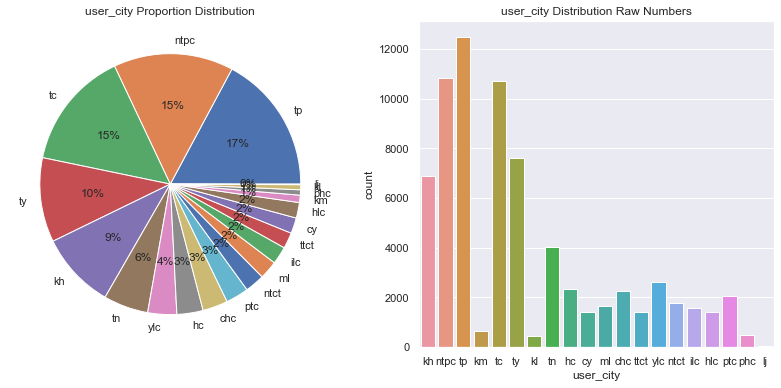

 
IS_SELF_COACH:
False    72161
True       597
Name: is_self_coach, dtype: int64
 


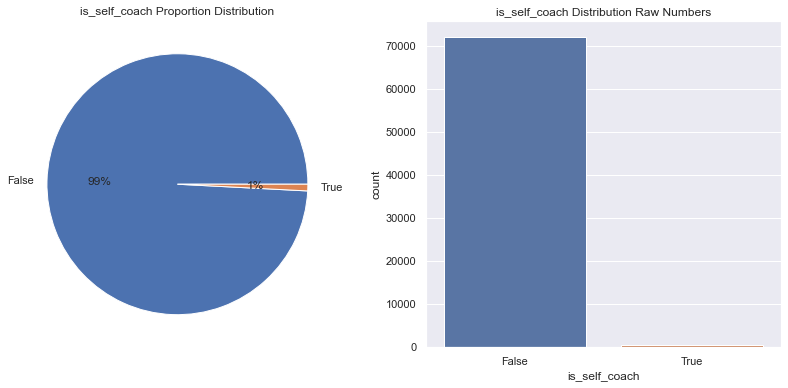

In [123]:
plotVariableAnalysis(user, ['points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'has_student_cnt', 'belongs_to_class_cnt', 'has_class_cnt'], ['gender', 'user_city', 'is_self_coach'])

For Log data

For Continous Features:



EXERCISE_PROBLEM_REPEAT_SESSION:


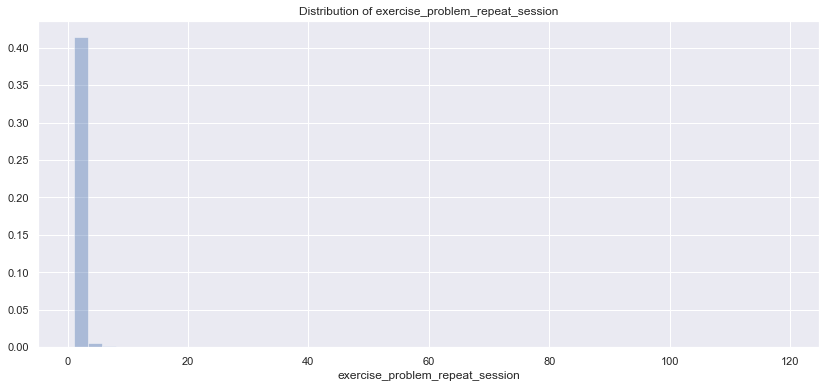

 Statistical Analysis of EXERCISE_PROBLEM_REPEAT_SESSION:



count    1.621731e+07
mean     1.261218e+00
std      1.173484e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.190000e+02
Name: exercise_problem_repeat_session, dtype: float64
 
TOTAL_SEC_TAKEN:


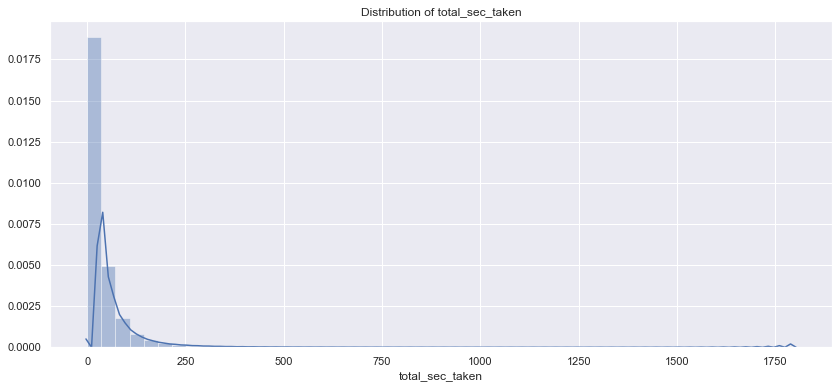

 Statistical Analysis of TOTAL_SEC_TAKEN:



count    1.621731e+07
mean     4.438166e+01
std      1.005375e+02
min      0.000000e+00
25%      1.000000e+01
50%      2.100000e+01
75%      4.500000e+01
max      1.800000e+03
Name: total_sec_taken, dtype: float64
 
TOTAL_ATTEMPT_CNT:


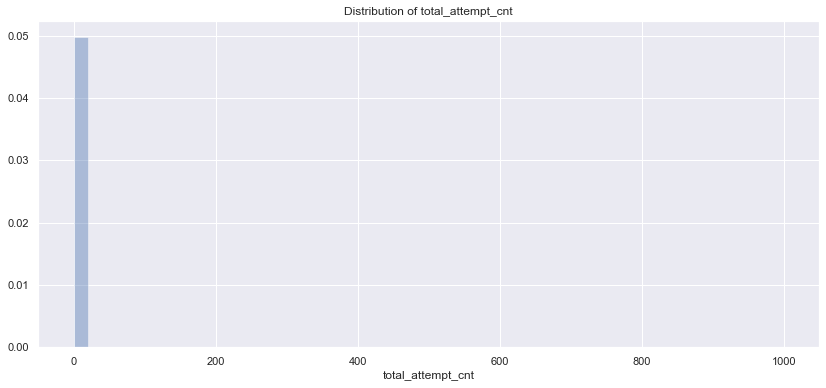

 Statistical Analysis of TOTAL_ATTEMPT_CNT:



count    1.621731e+07
mean     1.874895e+00
std      3.547947e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+03
Name: total_attempt_cnt, dtype: float64
 
USED_HINT_CNT:


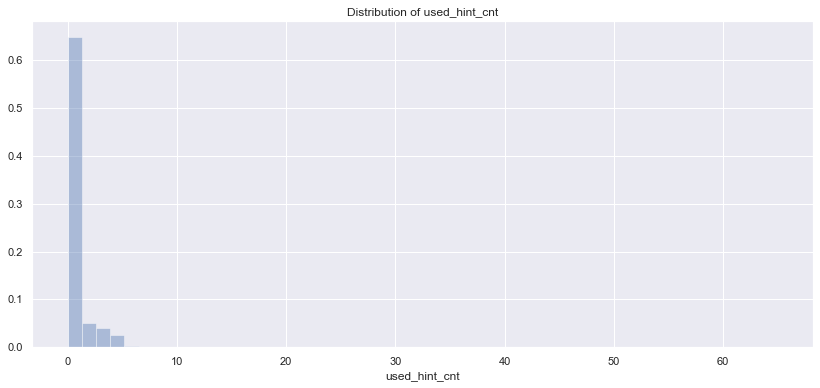

 Statistical Analysis of USED_HINT_CNT:



count    1.621731e+07
mean     5.333163e-01
std      1.156917e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.500000e+01
Name: used_hint_cnt, dtype: float64
 
For Categorical Features:



IS_CORRECT:
True     11412558
False     4804753
Name: is_correct, dtype: int64
 


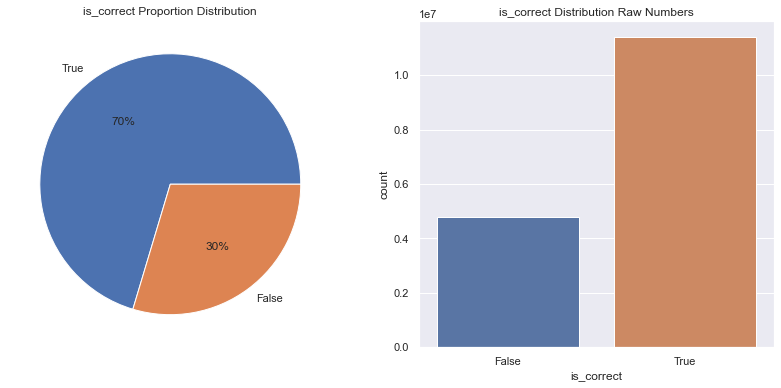

 
IS_HINT_USED:
False    12514071
True      3703240
Name: is_hint_used, dtype: int64
 


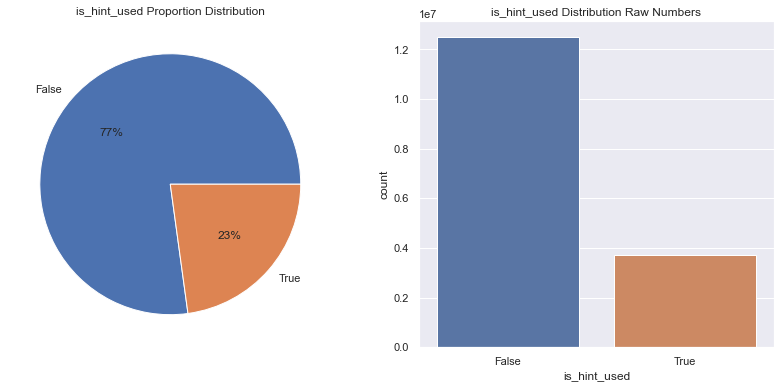

 
IS_UPGRADE:
True     1758026
False      23267
Name: is_upgrade, dtype: int64
 


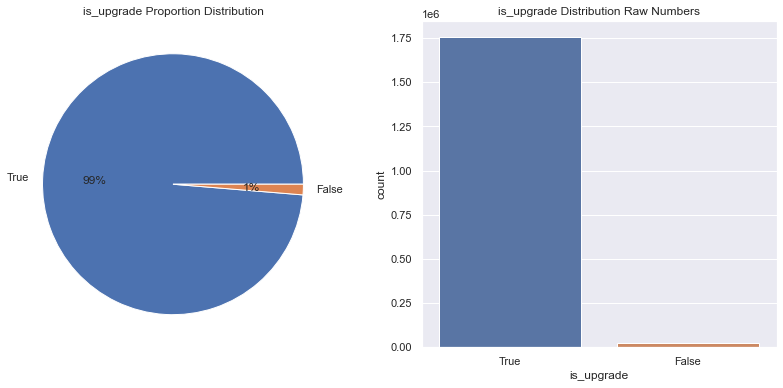

 
LEVEL:
0    11809119
1     2352668
2      996819
3      751424
4      307281
Name: level, dtype: int64
 


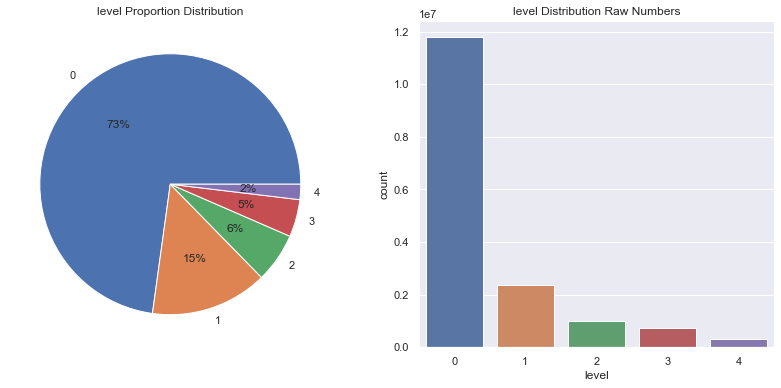

In [134]:
plotVariableAnalysis(log, ['exercise_problem_repeat_session', 'total_sec_taken' ,'total_attempt_cnt', 'used_hint_cnt'], ['is_correct', 'is_hint_used', 'is_upgrade', 'level'])

In [20]:
log.groupby('ucid')['upid'].nunique().reset_index().describe()

,upid
count,1326.000000
mean,20.040724
std,7.189500
min,3.000000
25%,16.000000
50%,18.000000
75%,21.000000
max,67.000000


Understanding the problem sequence

In [198]:
sorted_log = log.sort_values(['uuid', 'ucid', 'problem_number'])
grouped_log = sorted_log.groupby(['ucid','uuid'])
seq = grouped_log.upid.apply(list).reset_index()
seq.rename(columns={'upid':'sequence'}, inplace=True)

Getting the count for each sequence

In [208]:
seq['sequence'] = seq['sequence'].apply(lambda x: str(x))
seq_count = seq.groupby(['ucid', 'sequence']).count().sort_values('uuid').reset_index()
seq_count.rename(columns={'uuid': 'count'}, inplace=True)

In [217]:
seq_count['count'].describe()

count    1.676496e+06
mean     1.031968e+00
std      3.777604e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.500000e+01
Name: count, dtype: float64

Treating it as a categorical variable

For Continous Features:



For Categorical Features:



COUNT:
1     1651909
2       14273
3        4313
4        2084
5        1332
6         826
7         559
8         358
9         266
10        150
11        119
12         80
14         46
13         44
15         28
16         20
17         19
18         14
19         12
21          8
20          7
22          6
23          5
24          4
25          4
26          3
28          3
35          2
33          1
29          1
Name: count, dtype: int64
 


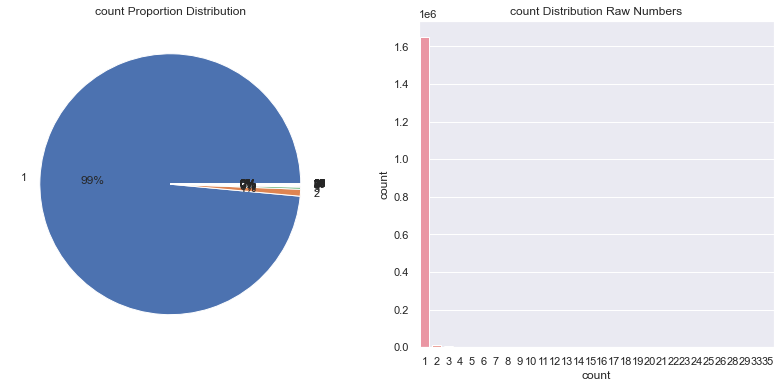

In [218]:
plotVariableAnalysis(seq_count, [], ['count'])

As a result, since there are too many possible sequences. 

The minimum number of questions required to become proficient in an exercise (from level 0 to level 4) is 11.
Assuming there are only 11 problems in the pool for an exercise and every user only requires the minimum number of questions to become proficient, there are a total of 11! unique sequences which the questions can come out.

However, we know that the assumption is not true -- from the dataset we see there there in an average number of 20 questions per exercise, and students that fail to get any of the questions correct will need more questions in order to become proficient. This way, the number of sequences that are available will increase significantly. As such, it might not be realistic to consider all the problems that appear.

Instead, we can consider removing problems that do not appear frequently, taking only ..... (explains the filter here)

In [228]:
problem_count = log.groupby('upid').count()['uuid'].reset_index()
problem_count.rename(columns={'uuid' : 'count'}, inplace=True)

In [229]:
problem_count['count'].describe()

count    25785.000000
mean       628.943611
std        670.637128
min          1.000000
25%        184.000000
50%        482.000000
75%        871.000000
max       6994.000000
Name: count, dtype: float64

Remove problems below the 50% quantile

In [244]:
frequent_uuids = list(problem_count.loc[problem_count['count'] >= 871].upid)
filtered_log = log.loc[log['upid'].isin(frequent_uuids)]
sorted_log = filtered_log.sort_values(['uuid', 'ucid', 'problem_number'])
grouped_log = sorted_log.groupby(['ucid','uuid'])
seq = grouped_log.upid.apply(list).reset_index()
seq.rename(columns={'upid':'sequence'}, inplace=True)

In [245]:
seq['sequence'] = seq['sequence'].apply(lambda x: str(x))
seq_count = seq.groupby(['ucid', 'sequence']).count().sort_values('uuid').reset_index()
seq_count.rename(columns={'uuid': 'count'}, inplace=True)

In [246]:
seq_count['count'].describe()

count    956757.000000
mean          1.128283
std           3.613175
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         778.000000
Name: count, dtype: float64

In [248]:
seq_count

,ucid,sequence,count
0,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,['2OcMR73JceqYNJ6Zrzu7lkt4iqDWZLsQe3JSnJ0Z27c=...,1
1,eeZVLiOU7OQMzmiBBpfdNeiopHtz9V4xk1B4/c7f4ok=,['zqMVTh9nJ9hVaOx2OqXoQ8KVg60J4cyQq+RNRV7Kcg0=...,1
2,eeZVLiOU7OQMzmiBBpfdNeiopHtz9V4xk1B4/c7f4ok=,['zqMVTh9nJ9hVaOx2OqXoQ8KVg60J4cyQq+RNRV7Kcg0=...,1
3,eem9dUXJyUw0k1eqjFlnFp52CjkEsGsRMN5hIg7AxIg=,['+tGlE8Y5DJFlcrziY/Te9fFQMNfynCY1DSuw5iKool8=...,1
4,eem9dUXJyUw0k1eqjFlnFp52CjkEsGsRMN5hIg7AxIg=,['+tGlE8Y5DJFlcrziY/Te9fFQMNfynCY1DSuw5iKool8=...,1
...,...,...,...
956752,lfFL8LesAlY1wX0+sveN0vu8YZEg5bKCXUOGCLqRxuM=,['ERk5Gl33HeCTnBf/5Sb9ENdnavBdJHhoG8xa8CmguFU='],688
956753,U4IDn4MUqbVq2R5M08n344XMXc052OsQtinVwrNNkSk=,['2NGxd5TushL2CNLJme0HVhl4elSqSlskOVJxyp+/bjs='],733
956754,nPsED61TTD7PvRSGYJUPEHBUKdezjtZUIvu4i8tBFdY=,['V6tyTM+uuMZqnLDWVeFu0nJAcj903AoNKVEcckQzafU='],769
956755,CHLr4TQcYRa8ps6Vpimyi7fiuL+EtoUaN1YAWoCE+Tw=,['vOwOfDY34JJpNebGPU1TTrPM1QOFDC+k1cF1QtIwx9A='],777


For Continous Features:



For Categorical Features:



COUNT:
1      934036
2       11439
3        3541
4        1862
5        1283
        ...  
152         1
151         1
150         1
149         1
483         1
Name: count, Length: 211, dtype: int64
 


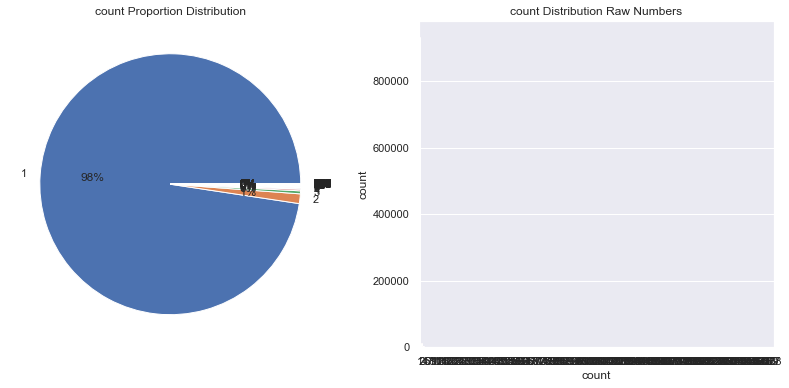

In [247]:
plotVariableAnalysis(seq_count, [], ['count'])

## Alternative approach to get avg_time_per_problem
This takes the time of the last problem attempted for each exercise as the "exercise time"

In [4]:
## converting timestamp column to datetime 
import datetime as dt
df = log.copy()
df['timestamp_TW'] = df['timestamp_TW'].apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S"))

In [5]:
# group by uuid and ucid, taking the max timestamp as the exercise time
grouped = df.groupby(['uuid','ucid'])
sorted_time = grouped.timestamp_TW.max().reset_index().sort_values(['uuid', 'timestamp_TW'])
sorted_time.rename(columns={'timestamp_TW':'timestamp_completed'}, inplace=True)

# taking the diff between each exercise for each user
res = sorted_time.groupby('uuid').timestamp_completed.diff()
res = res.apply(lambda x: x.total_seconds())
res.rename("time_diff", inplace=True)
sorted_time = sorted_time.join(res)

In [10]:
output = sorted_time.groupby('uuid').time_diff.mean()
output = output.reset_index().set_index('uuid')
output = output.loc[~output.time_diff.isnull()]

## Clustering (KNN)

In [12]:
import matplotlib.pyplot as plt
from __future__ import division
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from math import sqrt
import seaborn as sns
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
feature_list =  ["time_diff"]
features = output[feature_list]
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [15]:
N_cluster = range(1, 11) 
WSS_list = [] 
for k in N_cluster:    
    #n_jobs of -1 to use all processors to speed it up 
    cluster = KMeans(n_clusters=k, random_state=31, n_jobs=-1) 
    model = cluster.fit(features_std) 
    centroids = model.cluster_centers_ 
    labels = model.labels_ 
    squared_distance = cdist(features_std, centroids, 'sqeuclidean') 
    min_distance = np.min(squared_distance, axis=1) 
    WSS = np.sum(min_distance)
    WSS_list.append(WSS)  

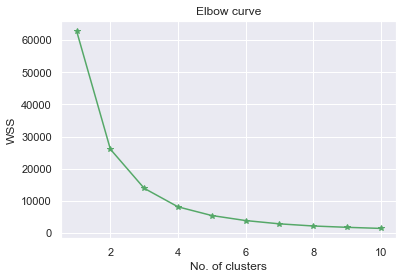

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_cluster, WSS_list, 'g*-')
# ax.plot(N_cluster[2], WSS_list[2], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('WSS')
plt.title('Elbow curve')
plt.show()

In [17]:
cluster_3 = KMeans(n_clusters=3, random_state=31, n_jobs=-1)
model_3 = cluster_3.fit(features) 
model_std_3 = cluster_3.fit(features_std) 

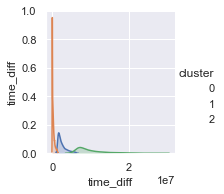

In [18]:
y_pred = cluster_3.fit_predict(features_std) 
data = deepcopy(output[feature_list])
data['cluster'] = y_pred
sns.pairplot(data, hue='cluster', diag_kind='kde', markers=['o','s','D'])

## Hierarchial Clustering
1. Start with n clusters (each record is its own cluster)
2. Merge two closest records into one cluster
3. At each successive step, the two clusters closest to each other are merged 

##### Hierarchical Clustering via Scikit-Learn

In [ ]:
HC = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage ='ward')
HC.fit_predict(features_std)

In [ ]:
plt.scatter(features_std[:,0],features_std[:,1], c=HC.labels_, cmap='rainbow')

#### Dandogram for Hierarchical Clustering

In [ ]:
features_std2 = features_std
H_cluster = linkage(features_std2,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (Cluster Size)')
plt.ylabel('Distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  
    p=10,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

## DBSCAN

In [ ]:
dbscan_cluster = DBSCAN(min_samples=120) 
model = dbscan_cluster.fit(features_std)
dbscan_labels = model.labels_
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan_cluster.core_sample_indices_] = True
clusters = dbscan_cluster.fit_predict(features_std)

In [ ]:
data = deepcopy(df[feature_list])
data['cluster'] = clusters
print("Number of outlier points = " + \
      str(len(data.loc[data["cluster"] == -1])))
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Number of points belonging to cluster 1 = " + \
      str(len(data.loc[data["cluster"] == 0])))
print("Number of points belonging to cluster 2 = " + \
      str(len(data.loc[data["cluster"] == 1])))
print("Number of points belonging to cluster 3 = " + \
      str(len(data.loc[data["cluster"] == 2])))

## Perfomance Comparison using Silhouette Coefficient

In [ ]:
print(metrics.silhouette_score(features_std, cluster_3.labels_, metric='euclidean'))
print(metrics.silhouette_score(features_std2, HC.labels_, metric='euclidean'))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(features_std, dbscan_labels))